# Occupy Controversy Scoring: Inter-coder reliability

This notebook includes the analysis for the inter-rate reliability of the controversy-coding method from "Meeting Democracy" by Donatella della Porta and Dieter Rucht applied to meetings from the Occupy movement.

We use [Krippendorff's Alpha](https://en.wikipedia.org/wiki/Krippendorff%27s_alpha) as our metric of inter-coder reliability, computed with an adapted [impementation by Thomas Grill](https://github.com/grrrr/krippendorff-alpha/blob/master/krippendorff_alpha.py).

In [49]:
import pandas
import krippendorff_alpha as ka
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
import plotly.figure_factory as ff
import scipy
plotly.tools.set_credentials_file(username='bsheffer', api_key='j9uqpB0oxGvWHBFbsWwO')

In [24]:
coder_scores = pandas.read_csv('Pre-Analysis (3-12) - Raw Data.csv', header=0)
coder_scores.head()

,Controversy ID,Round,Video Link,Brief Description of Controversy,DREF1,DATTTOT,DPART,DFPART,DRECI,DSYMM,...,DUNCIV,DFOCUS,DATMO,DDECMOD,DDECOUT,DORIGIN,DPRESS,DDECORI,DMODERA,DMODDIS
0,1,1,https://www.youtube.com/watch?v=aRqDc1r7NjQ,A conflict among members about how to get more...,4,10.0,4,2,2,3,...,2,2,2,1,1,1,2,1,2,1
1,2,1,https://www.youtube.com/watch?v=5KTANaT_lEM,Controversy over how proposals should be manag...,1,15.0,12,7,3,1,...,2,2,3,2,2,5,1,1,1,3
2,3,1,https://www.youtube.com/watch?v=a-yTHSRMaXY,Debate about whether or not to occupy public a...,4,10.0,3,1,1,2,...,1,2,1,2,5,5,1,0,1,3
3,4,1,https://www.youtube.com/watch?v=cMCxnU0BnOA,deciding whether to recap the previous night's...,1,60.0,7,3,1,2,...,2,2,3,1,3,2,2,2,1,2
4,5,1,https://www.youtube.com/watch?v=lPmwLrsmY5c&t=...,External Group Action,4,15.0,6,3,2,2,...,2,2,2,1,1,4,3,1,1,3


In [57]:
codes_offset = 8
code_names = coder_scores.columns[codes_offset:]
scale_type = ['Ordinal','Ordinal','Ordinal','Nominal','Ordinal','Nominal','Ordinal','Ordinal','Ordinal','Nominal','Nominal','Nominal','Ordinal','Ordinal','Nominal','Ordinal']

num_straps = 100
variable_alpha_mean_array = []
variable_alpha_sem_array = []
variable_alpha_name_array = []
for i, code in enumerate(code_names):
    print code
    if code == 'DATTTOT': continue
    alpha_array = []
    round_1 = coder_scores[code][coder_scores['Round'] == 1]
    round_2 = coder_scores[code][coder_scores['Round'] == 2]
    if scale_type[i] == 'Nominal':
        metric = ka.nominal_metric
    elif scale_type[i] == 'Ordinal':
        metric = ka.ordinal_metric
    elif scale_type[i] == 'Interval':
        metric = ka.interval_metric
    for strap in range(num_straps):
        inds = np.random.choice(len(round_1),len(round_1))
        alpha = ka.krippendorff_alpha(np.row_stack([round_1, round_2])[:,inds],metric, missing_items='*')
        alpha_array.append(alpha)
    variable_alpha_mean_array.append(np.mean(alpha_array))
    variable_alpha_sem_array.append(np.std(alpha_array)/np.sqrt(len(round_1)))
    variable_alpha_name_array.append(code)

DRECI
DSYMM
DPOWER
DPSOUR
DCOOP
DCONFL
DUNCIV
DFOCUS
DATMO
DDECMOD
DDECOUT
DORIGIN
DPRESS
DDECORI
DMODERA
DMODDIS


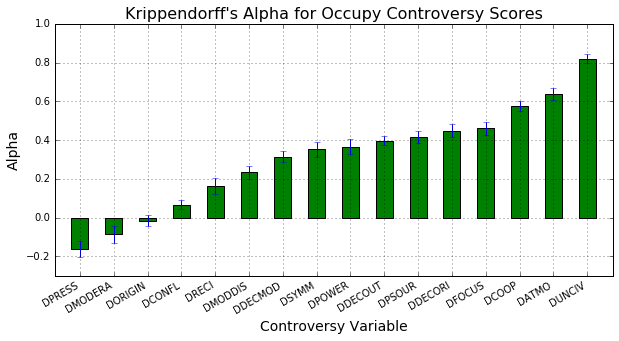

In [85]:
variable_alpha_mean_array = np.array(variable_alpha_mean_array)
variable_alpha_sem_array = np.array(variable_alpha_sem_array)
variable_alpha_name_array = np.array(variable_alpha_name_array)
scale_type = np.array(scale_type)

sort_inds = np.argsort(variable_alpha_mean_array)
variable_alpha_mean_array = variable_alpha_mean_array[sort_inds]
variable_alpha_sem_array = variable_alpha_sem_array[sort_inds]
variable_alpha_name_array = variable_alpha_name_array[sort_inds]
scale_type = scale_type[sort_inds]
plot_inds = np.arange(len(variable_alpha_mean_array))
fig, ax = plt.subplots(figsize=(10,5))
width = .5
ax.bar(plot_inds, variable_alpha_mean_array, width, yerr = variable_alpha_sem_array, color = 'g')
ax.set_xticklabels(variable_alpha_name_array.tolist())
ax.set_xticks(plot_inds +.5*width)
fig.autofmt_xdate()
ax.grid(True)
ax.set_xlim([-width, ax.get_xlim()[1]])
ax.set_ylim([-.3, 1])
ax.set_xlabel('Controversy Variable', fontsize=14)
ax.set_ylabel('Alpha', fontsize=14)
ax.set_title('Krippendorff\'s Alpha for Occupy Controversy Scores', fontsize=16)
fig.savefig('Krippendorff\'s Alpha for Occupy Controversy Scores', dpi=500)

In [88]:
data_matrix = [['Variable', 'Scale', 'Krippendorff\'s Alpha']]
for i, code in enumerate(variable_alpha_name_array):
    print "%s (%s): %f (+/- %f)" % (code, scale_type[i], variable_alpha_mean_array[i], variable_alpha_sem_array[i])

# py.iplot(table, filename='Inter-coder reliability')

DPRESS (Ordinal): -0.161919 (+/- 0.041664)
DMODERA (Ordinal): -0.085865 (+/- 0.042580)
DORIGIN (Ordinal): -0.015502 (+/- 0.026705)
DCONFL (Nominal): 0.065369 (+/- 0.023031)
DRECI (Ordinal): 0.163535 (+/- 0.040227)
DMODDIS (Nominal): 0.232841 (+/- 0.035470)
DDECMOD (Ordinal): 0.314741 (+/- 0.028480)
DSYMM (Ordinal): 0.351435 (+/- 0.036589)
DPOWER (Ordinal): 0.366227 (+/- 0.039448)
DDECOUT (Nominal): 0.397164 (+/- 0.025153)
DPSOUR (Nominal): 0.416927 (+/- 0.031215)
DDECORI (Nominal): 0.449070 (+/- 0.035393)
DFOCUS (Ordinal): 0.461496 (+/- 0.034133)
DCOOP (Ordinal): 0.576331 (+/- 0.026009)
DATMO (Nominal): 0.637760 (+/- 0.029458)
DUNCIV (Ordinal): 0.820061 (+/- 0.021612)
